In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\druda\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
alcohol_data = pd.read_csv("cardio_alco.csv")
data = pd.read_csv("cardio_base.csv")

In [3]:
del alcohol_data['id;alco'] # delete this column

In [4]:
alcohol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [6]:
data.age.unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926], dtype=int64)

In [7]:
def days_to_years(days):
    years = days/365
    return years
data.age = days_to_years(data.age)

In [8]:
# Weight difference between highest and lowest age groups
# Group the dataset by age and calculate the average weight for each age group
grouped_data = data.groupby('age')['weight'].mean()

# Find the age group with the highest average weight
highest_avg_weight_age_group = grouped_data.idxmax()

# Find the age group with the lowest weight
lowest_weight_age_group = grouped_data.idxmin()

# Calculate the weight difference between the highest and lowest age groups
weight_difference = grouped_data[highest_avg_weight_age_group] - grouped_data[lowest_weight_age_group]

# Print the weight difference
print("Weight difference between highest and lowest age groups:", weight_difference)

# Calculate the weight difference as a percentage of the average weight of the age group with the highest weight
weight_difference_percentage = (weight_difference / grouped_data[highest_avg_weight_age_group]) * 100

# Print the weight difference as a percentage
print("Weight difference as a percentage:", weight_difference_percentage)

Weight difference between highest and lowest age groups: 154.0
Weight difference as a percentage: 93.33333333333333


In [10]:
above_50 = data[data['age']>50]
below_50 = data[data['age']<=50]

avg_cholesterol_below_50 = below_50['cholesterol'].mean()
avg_cholesterol_above_50 = above_50['cholesterol'].mean()

if avg_cholesterol_below_50 > avg_cholesterol_above_50:
    print("People below 50 have higher cholesterol")
else:
    print("People above 50 have lower cholesterol")

People above 50 have lower cholesterol


In [11]:
women = data[data['gender']==1]
men = data[data['gender']==2]

do_women_smoke = women['smoke'].value_counts().get(1,0)
do_men_smoke = men['smoke'].value_counts().get(1,0)

if do_women_smoke > do_men_smoke:
    print("women smoke more than men")
else:
    print("men smoke more tham women by", (do_men_smoke-do_women_smoke)*100/do_women_smoke,"%")

men smoke more tham women by 558.7945879458795 %


In [12]:
# Tallest of 1% people
sorted_data = data.sort_values("height", ascending=False)

height_cutoff = sorted_data['height'].quantile(0.99)

top_1_percent = sorted_data[sorted_data['height'] >= height_cutoff]

#Range of Top 1% people:
range_of_top_1_percent = (top_1_percent['height'].min(), top_1_percent['height'].max())
range_of_top_1_percent

(184, 250)

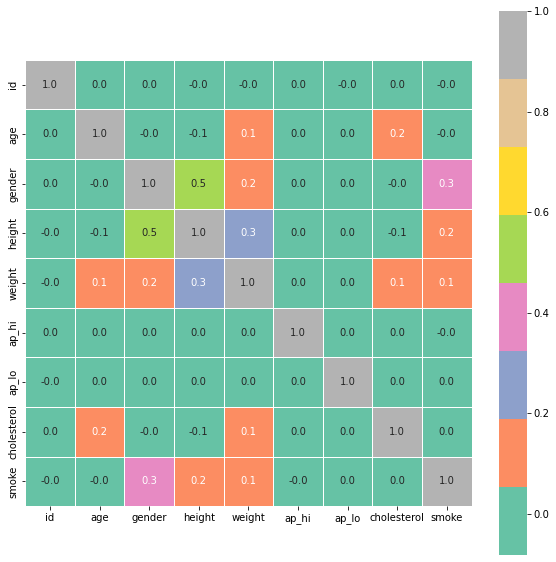

In [13]:
df_cust = data.select_dtypes(include=[np.float64, np.int64])
corr = df_cust.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Set2', linewidths=.5)
plt.show()

In [14]:
from scipy.stats import spearmanr
# Calculate Spearman rank correlation coefficient for the entire dataset
correlation_matrix, p_value_matrix = spearmanr(data)

# Extract the correlation coefficient from the matrix
gender_and_height_correlation = correlation_matrix[2, 3]  # Assuming you want the correlation between the columns gender and height

# Print the correlation coefficient
print("Spearman rank correlation coefficient:", gender_and_height_correlation)

Spearman rank correlation coefficient: 0.5338045129524459


In [15]:
# Extract the correlation coefficient from the matrix
gender_and_smoking_correlation = correlation_matrix[2, 8]  # Assuming you want the correlation between the columns gender and smoke

# Print the correlation coefficient
print("Spearman rank correlation coefficient:", gender_and_smoking_correlation)

Spearman rank correlation coefficient: 0.338135136358094


In [16]:
# Extract the correlation coefficient from the matrix
height_and_weight_correlation = correlation_matrix[3, 4]  # Assuming you want the correlation between the columns gender and weight

# Print the correlation coefficient
print("Spearman rank correlation coefficient:", height_and_weight_correlation)

Spearman rank correlation coefficient: 0.3135692698998496


In [19]:
# calculate percentage of people 2 devaiations away from the average height
average_height = data['height'].mean()

#Standard deviation value of height
std_dev = data['height'].std()

# Define a threshold
threshold = 2*std_dev

#required_range
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(x=data['height'], marker=dict(line=dict(color='black', width=1)))])
fig.update_layout(
    title = "Examining the frequency of occurence of each height",
    xaxis=dict(title='Values'),
    yaxis=dict(title='Frequency')
)
fig.show()

In [31]:
# Filter the dataset to include only the rows where the height is greater than or less than the threshold
filtered_data = data[(data['height'] > average_height + threshold) | (data['height'] < average_height - threshold)]
fraction = len(filtered_data)/len(data)

#percent of data beyond 2 stds away from mean:
print("The percentage of data 2 standard deviations away from mean is:", fraction*100)

The percentage of data 2 standard deviations away from mean is: 3.3357142857142854


In [32]:
df = pd.merge(data, alcohol_data, on="id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56903 entries, 0 to 56902
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           56903 non-null  int64  
 1   age          56903 non-null  float64
 2   gender       56903 non-null  int64  
 3   height       56903 non-null  int64  
 4   weight       56903 non-null  float64
 5   ap_hi        56903 non-null  int64  
 6   ap_lo        56903 non-null  int64  
 7   cholesterol  56903 non-null  int64  
 8   smoke        56903 non-null  int64  
 9   alco         56903 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.8 MB


In [34]:
smokers_data = df[df['smoke']==1]
non_smokers_data = df[df['smoke']==0]

mean_ap_high_smokers = smokers_data['ap_hi'].mean()
mean_ap_low_smokers = smokers_data['ap_lo'].mean()
mean_ap_high_non_smokers = non_smokers_data['ap_hi'].mean()
mean_ap_low_non_smokers = non_smokers_data['ap_lo'].mean()

if mean_ap_high_smokers > mean_ap_high_non_smokers and mean_ap_low_smokers < mean_ap_low_non_smokers:
    print("Smokers have higher blood pressure")
else:
    print("Smokers have lower blood pressure")

Smokers have lower blood pressure


In [53]:
# Separate the dataset into two groups: over 50 and below/equal to 50
over_50 = data[data['age'] >= 50]
under_50 = data[data['age'] < 50]

over_50_cholesterol = over_50['cholesterol'].mean()
under_50_cholesterol = under_50['cholesterol'].mean()
if over_50_cholesterol > under_50_cholesterol:
    print("Over 50 have higher cholesterol")
else:
    print("Under 50 have higher cholesterol")

Over 50 have higher cholesterol


In [47]:
non_smokers_avg_weight = non_smokers_data['weight'].mean()
smokers_avg_weight = smokers_data['weight'].mean()

if non_smokers_avg_weight > smokers_avg_weight:
    print("Smokers have lower average weight")
else:
    print("Smokers have higher average weight")

Smokers have higher average weight


In [52]:
# Separate dataset into men and women
men_data = data[data['gender'] == 1]
women_data = data[data['gender'] == 2]

# Calculate the mean or median of 'ap_hi' and 'ap_lo' for men and women
men_ap_hi_mean = men_data['ap_hi'].mean()
men_ap_lo_mean = men_data['ap_lo'].mean()
women_ap_hi_mean = women_data['ap_hi'].mean()
women_ap_lo_mean = women_data['ap_lo'].mean()

# Compare the mean values of blood pressure between men and women
if men_ap_lo_mean > women_ap_lo_mean:
    print("Men have higher blood pressure than women.")
else:
    print("Women have higher blood pressure than men.")

Women have higher blood pressure than men.
